# NHS resourcing and sentiment analysis 

An analysis of NHS appointment data and social media sentiment analysis of #healthcare tweets.

## 1) Data loading and cleaning

In [2]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')

# View the DataFrame.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [4]:
# Determine whether there are missing values.
ad.isnull().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

In [5]:
# Determine the metadata of the data set.
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [6]:
# Determine the descriptive statistics of the data set.
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [7]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')


# View the DataFrame.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [8]:
# Determine whether there are missing values.
ar.isnull().sum()

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

In [9]:
# Determine the metadata of the data set.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [10]:
# Determine the descriptive statistics of the data set.
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [11]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrame.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [12]:
# Determine whether there are missing values.
nc.isnull().sum()

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

In [13]:
# Determine the metadata of the data set.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [14]:
# Determine the descriptive statistics of the data set.
nc.describe()

,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


## 2) Preliminary exploratory analysis

**Question 1:** How many locations are there in the data set?

In [15]:
# Determine the number of locations.
print("Count of ICB sub-locations:")
print(ad.sub_icb_location_name.nunique())

Count of ICB sub-locations:
106


**Question 2:** What are the five locations with the highest number of records?



In [16]:
# Determine the top five locations based on record count.
print("Top ICB sub-locations by number of records:")
ad['sub_icb_location_name'].value_counts()

Top ICB sub-locations by number of records:


NHS Norfolk and Waveney ICB - 26A                 1484
NHS Greater Manchester ICB - 14L                  1484
NHS North West London ICB - W2U3Z                 1484
NHS Kent and Medway ICB - 91Q                     1484
NHS North East London ICB - A3A8R                 1484
                                                  ... 
NHS Staffordshire and Stoke-on-Trent ICB - 05D    1051
NHS South Yorkshire ICB - 03L                     1028
NHS North East and North Cumbria ICB - 00P        1025
NHS South Yorkshire ICB - 02P                     1022
NHS Cheshire and Merseyside ICB - 01F             1013
Name: sub_icb_location_name, Length: 106, dtype: int64

**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [17]:
# Determine the number of service settings.
print("Number of service settings:")
print(nc.service_setting.nunique())
print("Number of records per service setting:")
print(nc.service_setting.value_counts())

Number of service settings:
5
Number of records per service setting:
General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: service_setting, dtype: int64


In [18]:
# Determine the number of context types.
print("Number of context types:")
print(nc.context_type.nunique())
print("Number of records per context type:")
print(nc.context_type.value_counts())

Number of context types:
3
Number of records per context type:
Care Related Encounter    700481
Inconsistent Mapping       89494
Unmapped                   27419
Name: context_type, dtype: int64


In [19]:
# Determine the number of national categories.
print("Number of national categories:")
print(nc.national_category.nunique())
print("Number of records per national category:")
print(nc.national_category.value_counts())

Number of national categories:
18
Number of records per national category:
Inconsistent Mapping                                                   89494
General Consultation Routine                                           89329
General Consultation Acute                                             84874
Planned Clinics                                                        76429
Clinical Triage                                                        74539
Planned Clinical Procedure                                             59631
Structured Medication Review                                           44467
Service provided by organisation external to the practice              43095
Home Visit                                                             41850
Unplanned Clinical Activity                                            40415
Patient contact during Care Home Round                                 28795
Unmapped                                                               27419
C

In [20]:
# Determine the number of appointment status.
print("Number of appointment statuses:")
print(ar.appointment_status.nunique())
print("Number of records per appointment status:")
print(ar.appointment_status.value_counts())

Number of appointment statuses:
3
Number of records per appointment status:
Attended    232137
Unknown     201324
DNA         163360
Name: appointment_status, dtype: int64


## 3) Additional exploratory analysis

**Question 1:** Between what dates were appointments scheduled? 

In [21]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad.appointment_date.head()

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object

In [22]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc.appointment_date.head()

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [23]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# View the DateFrame.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


In [24]:
# Change the date format of nc['appointment_date'].
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# View the DateFrame.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [25]:
# Determine the minimum and maximum dates in the ad DataFrame.
print("The minimum appointment date in ad DataFrame is:")
print(ad['appointment_date'].min())
print("The maximum appointment date in ad DataFrame is:")
print(ad['appointment_date'].max())

The minimum appointment date in ad DataFrame is:
2021-12-01 00:00:00
The maximum appointment date in ad DataFrame is:
2022-06-30 00:00:00


In [26]:
# Determine the minimum and maximum dates in the nc DataFrame.
print("The minimum appointment date in nc DataFrame is:")
print(nc['appointment_date'].min())
print("The maximum appointment date in nc DataFrame is:")
print(nc['appointment_date'].max())

The minimum appointment date in nc DataFrame is:
2021-08-01 00:00:00
The maximum appointment date in nc DataFrame is:
2022-06-30 00:00:00


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [27]:
# Create a subset of nc filtered by North West London.
nc_subset = nc[nc['sub_icb_location_name']=='NHS North West London ICB - W2U3Z']

# Filter nc_subset by dates.
date_filter = (nc_subset['appointment_date'] > '2022-01-01') & (nc_subset['appointment_date'] < '2022-06-01')

# Count the records by service setting.
print("Between 2022-01-01 and 2022-06-01, the number of records in NHS North West London by service setting are:")
nc_subset[date_filter]['service_setting'].value_counts() 

Between 2022-01-01 and 2022-06-01, the number of records in NHS North West London by service setting are:


General Practice             2080
Other                        1307
Primary Care Network         1261
Extended Access Provision    1076
Unmapped                      150
Name: service_setting, dtype: int64

General practice was the most popular setting in the period and location considered.

**Question 3:** Which month had the highest number of appointments?

In [28]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.
print('Total number of appointments per month:')
nc['count_of_appointments'].groupby([nc['appointment_date'].dt.year, nc['appointment_date'].dt.month]) \
    .sum().sort_values(ascending=False)

Total number of appointments per month:


appointment_date  appointment_date
2021              11                  30405070
                  10                  30303834
2022              3                   29595038
2021              9                   28522501
2022              5                   27495508
                  6                   25828078
                  1                   25635474
                  2                   25355260
2021              12                  25140776
2022              4                   23913060
2021              8                   23852171
Name: count_of_appointments, dtype: int64

November 2021 registered the highest number of appointments.

**Question 4:** What was the total number of records per month?

In [29]:
# Total number of records per month.
print('Total number of records per month:')
nc['count_of_appointments'].groupby([nc['appointment_date'].dt.year, nc['appointment_date'].dt.month]) \
    .count().sort_values(ascending=False)

Total number of records per month:


appointment_date  appointment_date
2022              3                   82822
2021              11                  77652
2022              5                   77425
2021              9                   74922
2022              6                   74168
2021              10                  74078
                  12                  72651
2022              1                   71896
                  2                   71769
                  4                   70012
2021              8                   69999
Name: count_of_appointments, dtype: int64

## 4) Data visualisation and trend identification

In [30]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [56]:
# Aggregate on monthly level and determine the sum of records per month.
nc_ss = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# View output.
nc_ss.head()

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


**Service settings:**

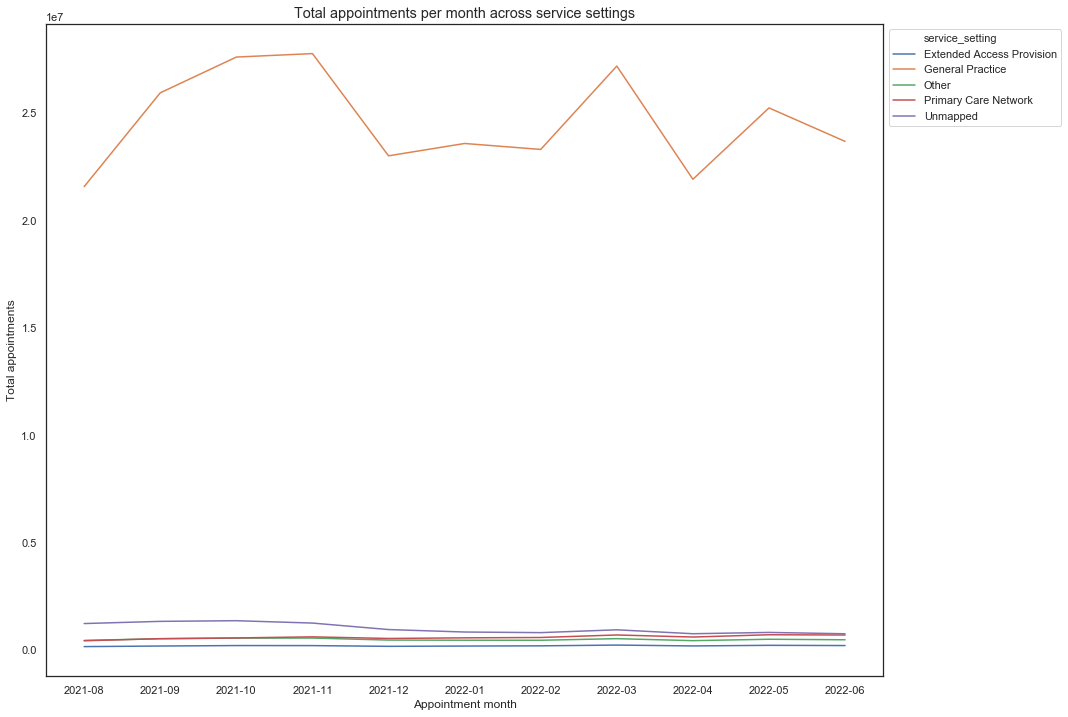

In [57]:
# Plot the appointments over the available date range, and review the service settings for months.

# Create a lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', data=nc_ss, hue='service_setting', ci=None)

# Add chart title and adjust titles on the axes.
plt.xlabel("Appointment month")
plt.ylabel("Total appointments")
plt.title("Total appointments per month across service settings", fontsize='large')

# Re-position the legend.
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot.
plt.show()

General practice is the service setting registering the highest number of appointments, and it shows greater seasonality compared to the other service settings (steeper peaks and drops), in particular around the autumn and spring time.

**Context types:**

In [58]:
# Aggregate on monthly level and determine the sum of records per month.
nc_ct = nc.groupby(['appointment_month', 'context_type'])['count_of_appointments'].sum().reset_index()

# View output.
nc_ct.head()

,appointment_month,context_type,count_of_appointments
0,2021-08,Care Related Encounter,20255235
1,2021-08,Inconsistent Mapping,2363093
2,2021-08,Unmapped,1233843
3,2021-09,Care Related Encounter,24404251
4,2021-09,Inconsistent Mapping,2782135


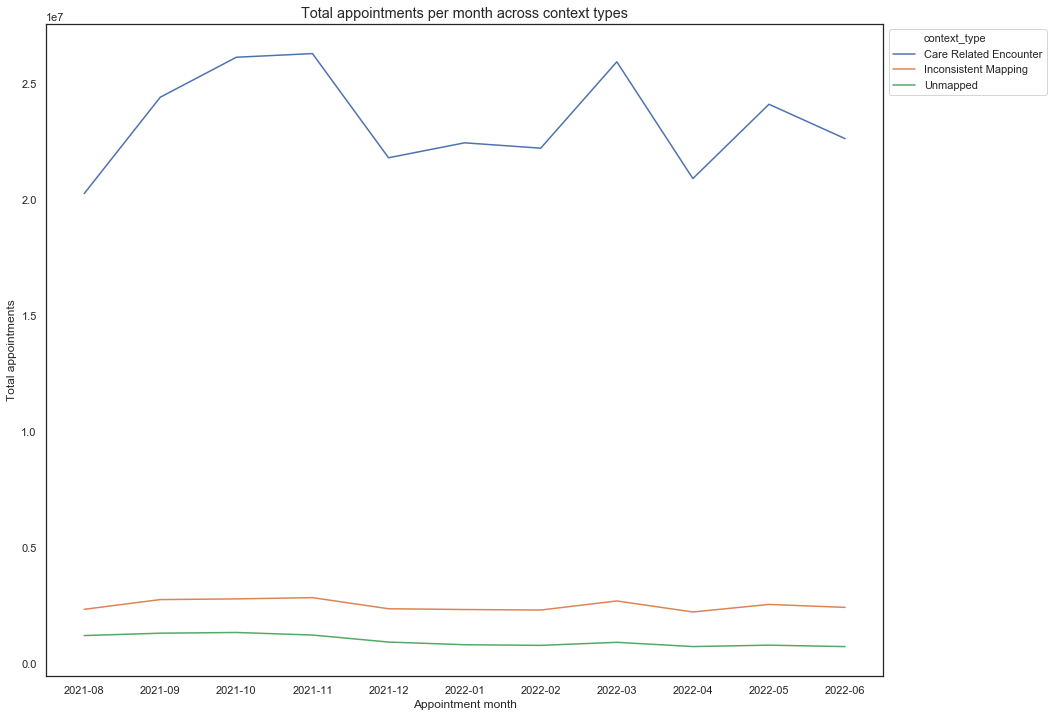

In [59]:
# Plot the appointments over the available date range, and review the context types for months.

# Create a lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', data=nc_ct, hue='context_type', ci=None)

# Add chart title and adjust titles on the axes.
plt.xlabel("Appointment month")
plt.ylabel("Total appointments")
plt.title("Total appointments per month across context types", fontsize='large')

# Re-position the legend.
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

#Show the plot.
plt.show()


Care Related Encounter is the context type registering the highest number of appointments, and it shows greater seasonality compared to the other service settings (steeper peaks and drops), in particular around the autumn and spring time - this is probably driven by the vast majority of service setting being General Practice appointments, which have a similar trend.

**National categories:**

In [35]:
# Aggregate on monthly level and determine the sum of records per month.
nc_nc = nc.groupby(['appointment_month', 'national_category'])['count_of_appointments'].sum().reset_index()

# View output.
nc_nc.head()

,appointment_month,national_category,count_of_appointments
0,2021-08,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08,Care Home Visit,47583
2,2021-08,Clinical Triage,3704207
3,2021-08,General Consultation Acute,4280920
4,2021-08,General Consultation Routine,7756045


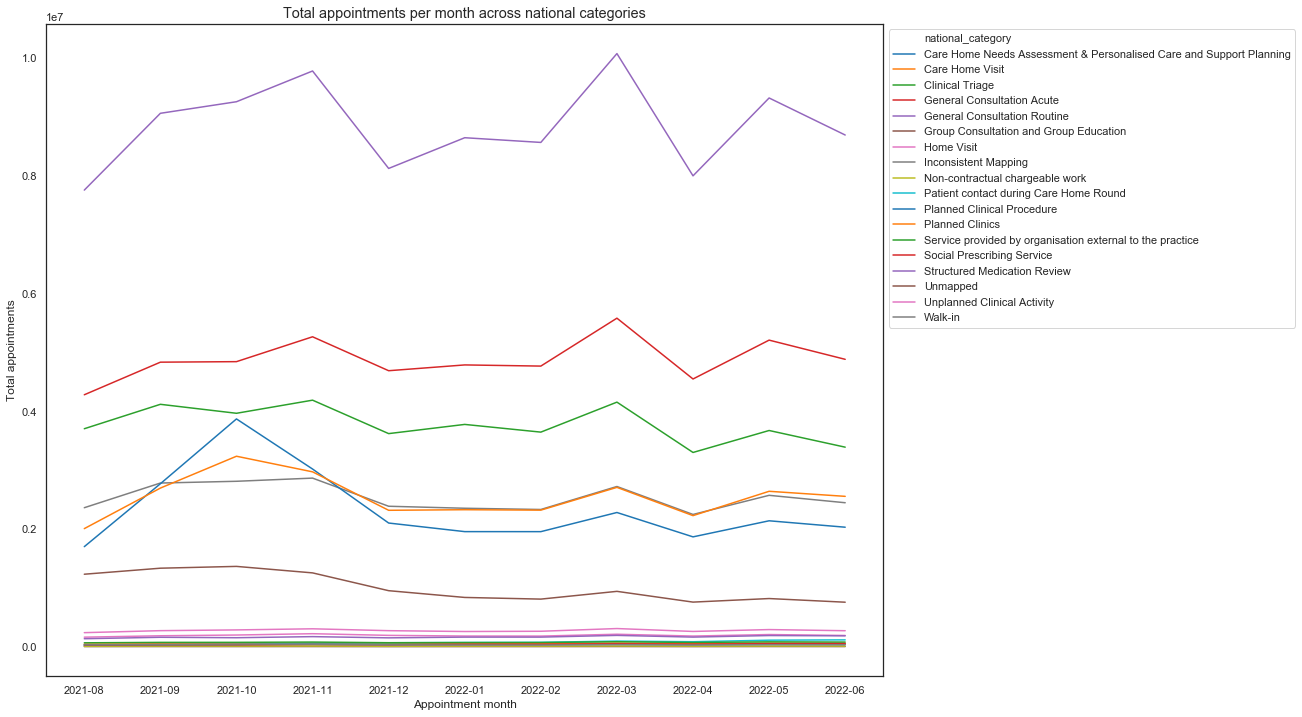

In [36]:
# Plot the appointments over the available date range, and review the context types for months.

# Create a lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', data=nc_nc, hue='national_category',\
             palette='tab10', ci=None)

# Add chart title and adjust titles on the axes.
plt.xlabel("Appointment month")
plt.ylabel("Total appointments")
plt.title("Total appointments per month across national categories", fontsize='large')

# Re-position the legend.
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

#Show the plot.
plt.show()

Given that the current chart presents 18 national categories, it makes distinguishing individual categories more difficult. To overcome this, I have created the following chart which filters out the categories with the lower numbers of appointments.

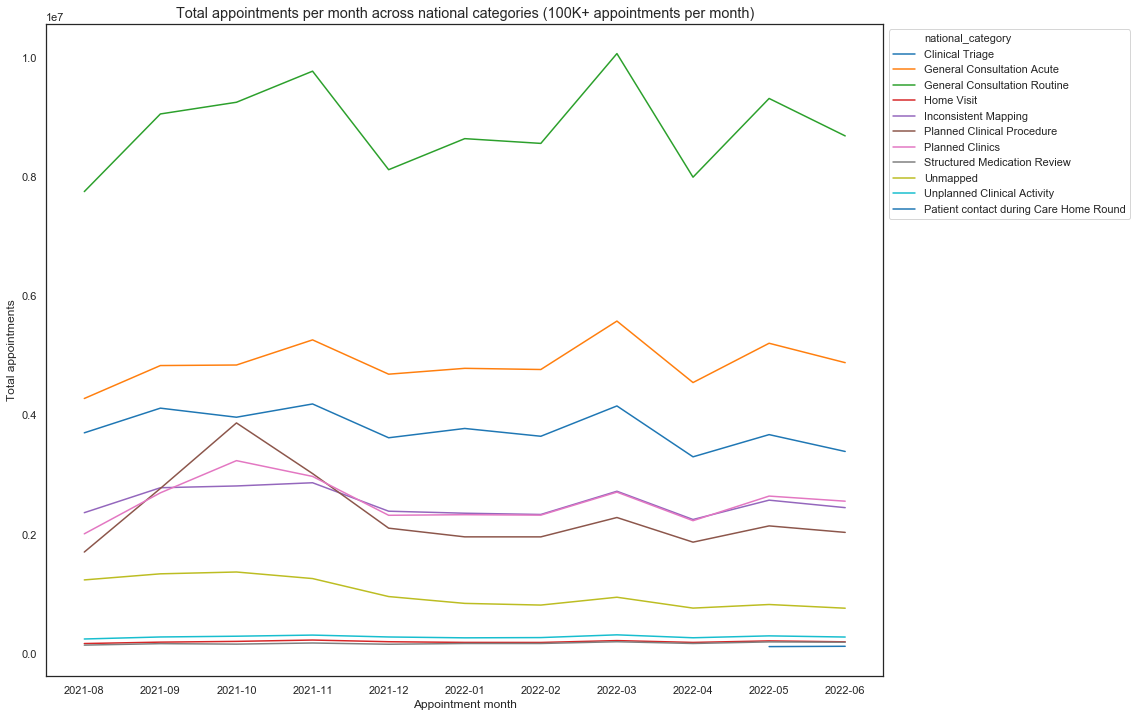

In [37]:
# Create a filter on the nc_nc dataframe to visualise national categories with over 100K each month.
filter_nc_nc = nc_nc[nc_nc['count_of_appointments'] > 100000]

# Create a lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', data=filter_nc_nc, hue='national_category',\
             palette='tab10', ci=None)

# Add chart title and adjust titles on the axes.
plt.xlabel("Appointment month")
plt.ylabel("Total appointments")
plt.title("Total appointments per month across national categories (100K+ appointments per month)", fontsize='large')

# Re-position the legend.
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

#Show the plot.
plt.show()

General Consultation Routine and General Consultation Acute are the categories registering the highest number of appointments, followed by Clinical Triage. Planned Clinics are the fourth largest category for appointments overall, except between Sep 2021 and Nov 21, where Planned Clinical Procedure was larger.

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**Summer (August 2021):**

In [38]:
# First create a dataframe that aggregates the appointments per month and day of appointment, and service setting.
nc_ss_day = nc.groupby(['appointment_date', 'appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# View output.
nc_ss_day

,appointment_date,appointment_month,service_setting,count_of_appointments
0,2021-08-01,2021-08,Extended Access Provision,438
1,2021-08-01,2021-08,General Practice,3411
2,2021-08-01,2021-08,Other,401
3,2021-08-01,2021-08,Primary Care Network,323
4,2021-08-01,2021-08,Unmapped,1054
...,...,...,...,...
1665,2022-06-30,2022-06,Extended Access Provision,9163
1666,2022-06-30,2022-06,General Practice,1124374
1667,2022-06-30,2022-06,Other,23115
1668,2022-06-30,2022-06,Primary Care Network,34774


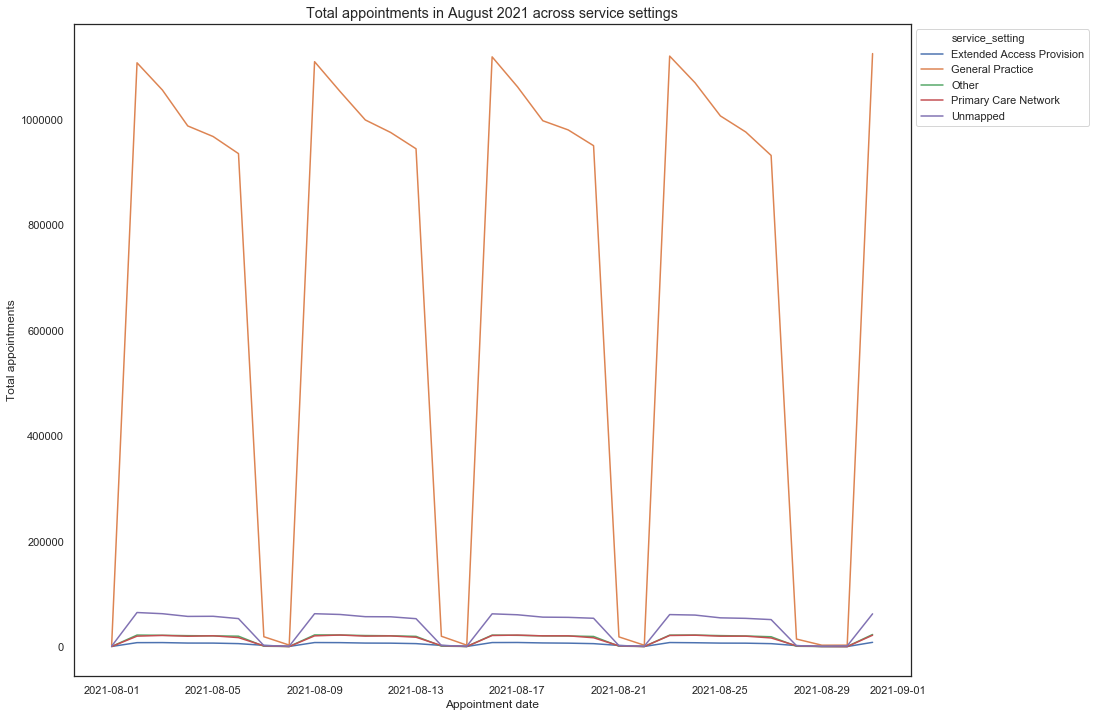

In [39]:
# Look at August 2021 in more detail to allow a closer look.
nc_ss_day_august2021 = nc_ss_day[nc_ss_day['appointment_month'] == "2021-08"]

# Create a lineplot.
sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_ss_day_august2021, \
             hue='service_setting')

# Add chart title and adjust titles on the axes.
plt.xlabel("Appointment date")
plt.ylabel("Total appointments")
plt.title("Total appointments in August 2021 across service settings", fontsize='large')
plt.xticks()

# Re-position the legend.
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

#Show the plot.
plt.show()


**Autumn (October 2021):**

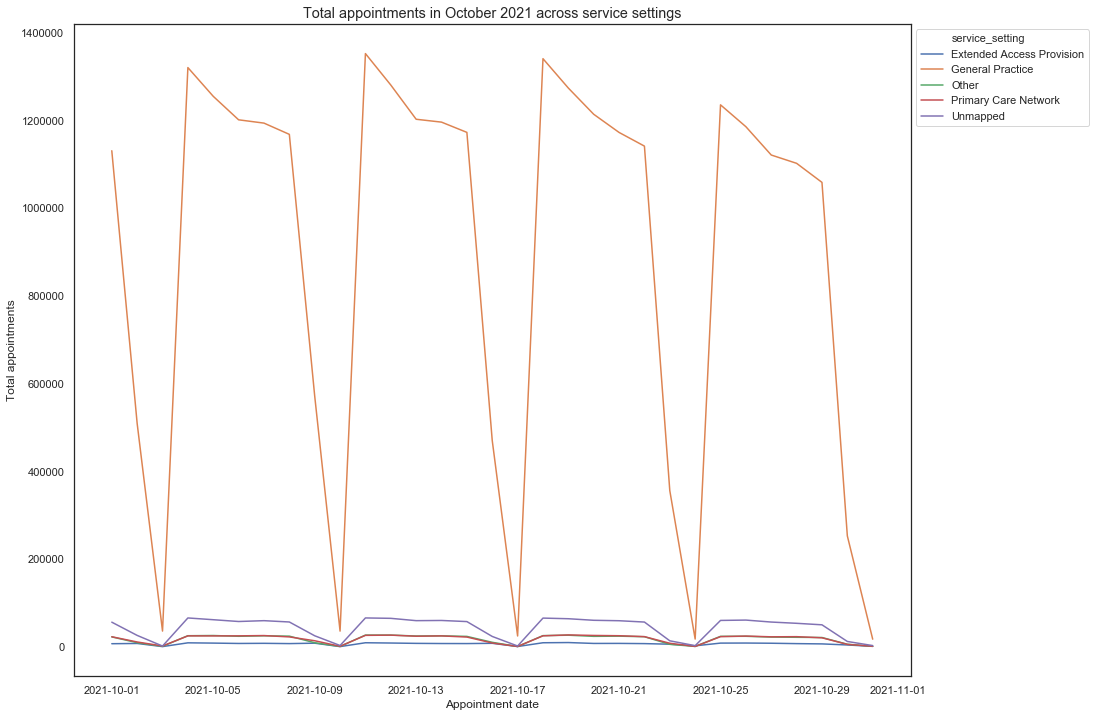

In [40]:
# Look at October 2021 in more detail to allow a closer look.
nc_ss_day_october2021 = nc_ss_day[nc_ss_day['appointment_month'] == "2021-10"]

# Create a lineplot.
sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_ss_day_october2021, \
             hue='service_setting')

# Add chart title, adjust titles on the axes, and add ticks.
plt.xlabel("Appointment date")
plt.ylabel("Total appointments")
plt.title("Total appointments in October 2021 across service settings", fontsize='large')
plt.xticks()

# Re-position the legend.
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

#Show the plot.
plt.show()


**Winter (January 2022):**

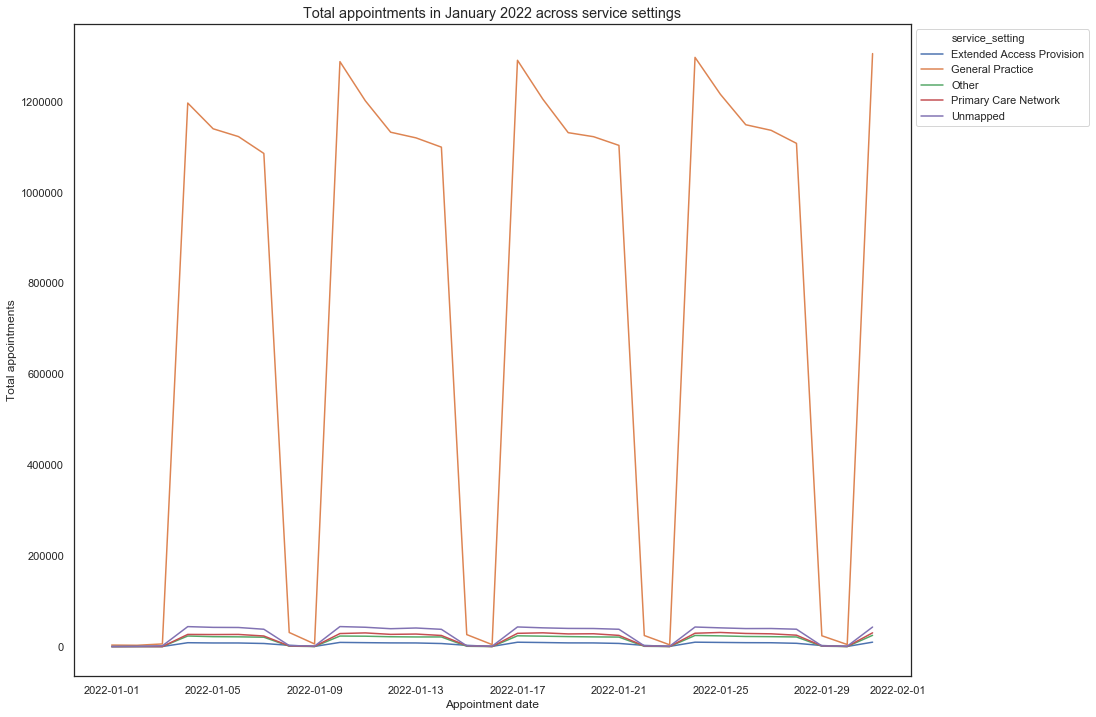

In [41]:
# Look at January 2022 in more detail to allow a closer look.
nc_ss_day_january2022 = nc_ss_day[nc_ss_day['appointment_month'] == "2022-01"]

# Create a lineplot.
sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_ss_day_january2022, \
             hue='service_setting')

# Add chart title, adjust titles on the axes, and add ticks.
plt.xlabel("Appointment date")
plt.ylabel("Total appointments")
plt.title("Total appointments in January 2022 across service settings", fontsize='large')
plt.xticks()

# Re-position the legend.
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

#Show the plot.
plt.show()


**Spring (April 2022):**

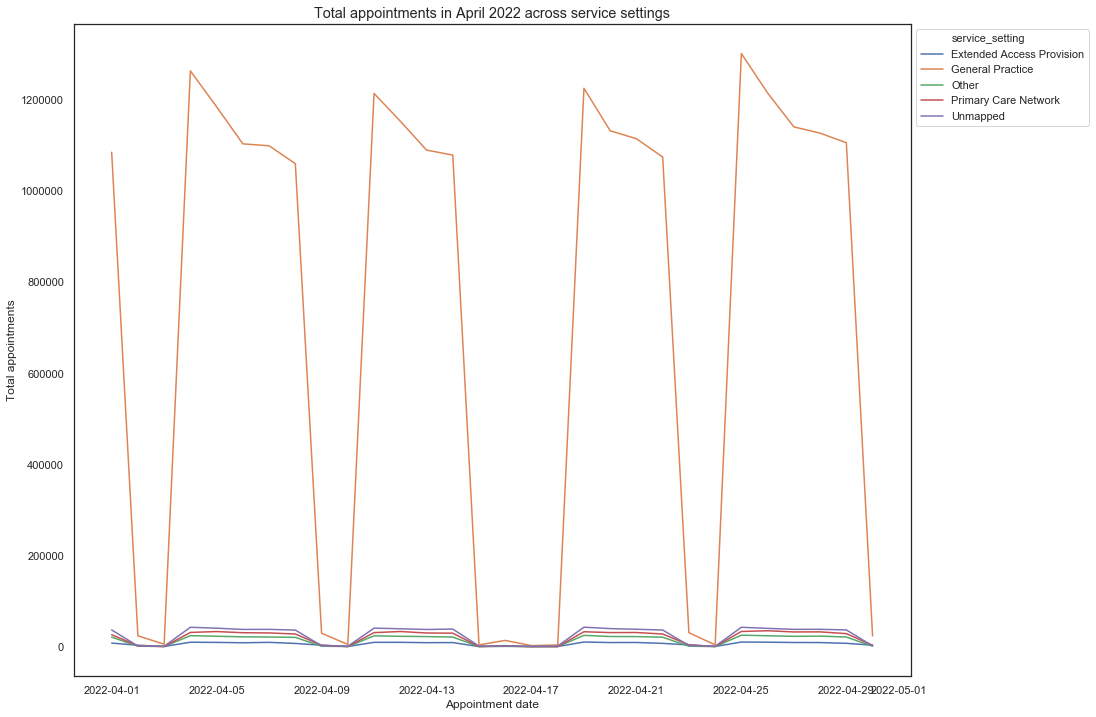

In [42]:
# Look at April 2022 in more detail to allow a closer look.
nc_ss_day_april2022 = nc_ss_day[nc_ss_day['appointment_month'] == "2022-04"]

# Create a lineplot.
sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_ss_day_april2022, \
             hue='service_setting')

# Add chart title, adjust titles on the axes, and add ticks.
plt.xlabel("Appointment date")
plt.ylabel("Total appointments")
plt.title("Total appointments in April 2022 across service settings", fontsize='large')
plt.xticks()

# Re-position the legend.
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

#Show the plot.
plt.show()


All four seasons show a drop in appointments coinciding with weekends, which accounts for lower volumes when certain service settings such as GP practices are closed. For GP practices in particular, there appear to be peaks at the beginning of the week, suggesting that this service setting is busier at certain points of the week more than other service settings are (lines appear to be relatively flat). Smoothing demand for GPs across the week where possible would lead to more stable demand.

## 5) Analysing NHS-related Twitter data

In [60]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [61]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
tweets

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
...,...,...,...,...,...,...,...,...,...,...
1169,1567583004209332227,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…,"{'hashtags': [{'text': 'Innovation', 'indices': [29, 40]}, {'text': 'precisionFabrication', 'indices': [50, 71]}, {'text': 'Microfluidic', 'indices': [92, 105]}], 'symbols': [], 'user_mentions': [...","#Innovation, #precisionFabrication, #Microfluidic","{'iso_language_code': 'en', 'result_type': 'recent'}",1,0,False,False,en
1170,1567582945342267393,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie...","{'hashtags': [{'text': 'SKPoli', 'indices': [232, 239]}, {'text': 'healthcare', 'indices': [240, 251]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/33f7Dz5FrU', 'expanded_u...","#SKPoli, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,1,False,False,en
1171,1567582936014241792,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp...","{'hashtags': [{'text': 'webinar', 'indices': [149, 157]}, {'text': 'ESG', 'indices'

In [62]:
# Explore the metadata.
tweets.describe()

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [63]:
# Explore the data set.
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [64]:
# Explore the data set.
tweets['tweet_retweet_count'].value_counts()

0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
208     12
6       12
35      10
11       6
37       6
10       5
53       5
44       4
150      4
63       4
76       3
41       3
85       3
207      3
62       3
68       3
24       2
23       2
16       2
72       2
78       2
13       1
303      1
14       1
15       1
19       1
20       1
40       1
48       1
49       1
54       1
57       1
79       1
107      1
169      1
39       1
Name: tweet_retweet_count, dtype: int64

In [65]:
# Explore the data set.
tweets['tweet_favorite_count'].value_counts()

0     1027
1       91
2       16
3       13
4        7
5        5
6        2
28       1
7        1
8        1
42       1
10       1
11       1
12       1
13       1
14       1
17       1
18       1
20       1
9        1
Name: tweet_favorite_count, dtype: int64

It would be useful to look at the most retweeted and favourited tweets, in particular in the case of high counts for high number of retweets/favourites. One such example might be 12 tweets that have been retweeted 208 times.
This analysis might shed some light on whether there are patterns in the content of the tweets that deal with healthcare in the UK.

In [66]:
# Create a new DataFrame containing only the text.
tweets_text = tweets[['tweet_full_text', 'tweet_entities', 'tweet_entities_hashtags']]

# View the DataFrame.
tweets_text

,tweet_full_text,tweet_entities,tweet_entities_hashtags
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring"
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare"
...,...,...,...
1169,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…,"{'hashtags': [{'text': 'Innovation', 'indices': [29, 40]}, {'text': 'precisionFabrication', 'indices': [50, 71]}, {'text': 'Microfluidic', 'indices': [92, 105]}], 'symbols': [], 'user_mentions': [...","#Innovation, #precisionFabrication, #Microfluidic"
1170,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie...","{'hashtags': [{'text': 'SKPoli', 'indices': [232, 239]}, {'text': 'healthcare', 'indices': [240, 251]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/33f7Dz5FrU', 'expanded_u...","#SKPoli, #healthcare"
1171,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp...","{'hashtags': [{'text': 'webinar', 'indices': [149, 157]}, {'text': 'ESG', 'indices': [209, 213]}, {'text': 'healthcare', 'indices': [235, 246]}], 'symbols': [], 'user_mentions': [{'screen_name': '...","#webinar, #ESG, #healthcare"
1172,Happy physiotherapy 🩺 day 🎉..\n#bpt #physiotherapy \n#HealthyNation #healthcare \n#medicalcare \n#csjmu .\n@WHO \n@MoHFW_INDIA \n@nitish_0210 https://t.co/NQHdIoYymC,"{'hashtags': [{'text': 'bpt', 'indices': [30, 34]}, {'text': 'physiotherapy', 'indices': [35, 49]}, {'text': 'HealthyNation', 'indices': [51, 65]}, {'text': 'healthcare', 'indices': [66, 77]}, {'t...","#bpt, #physiotherapy, #HealthyNation, #healthcare, #medicalcare, #csjmu"


In [67]:
# Loop through the messages, and create a list of values containing the # symbol.
tags = []

for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

In [68]:
# Convert tags to a Pandas Series.
tags = pd.Series(tags, name='Count')

# Count the values in the Series and display the top 30.
tag_counts = tags.value_counts()
tag_counts.head(30)

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#pharma                         25
#marketing                      25
#digitalhealth                  25
#competitiveintelligence        24
#medtwitter                     24
#biotech                        24
#meded                          23
#vaccine                        18
#hiring                         18
#technology                     17
#machinelearning                17
#news                           17
#covid                          16
#coronavirus                    16
#womeninmedicine                16
#competitivemarketing           16
#healthtech                     15
#wellness                       15
#medicare                       14
#covid19                        14
#science            

In [69]:
# Convert Series to a DataFrame
tags = pd.DataFrame(tag_counts).reset_index()

#View the DataFrame
tags

,index,Count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
...,...,...
1749,"(#wesleychapel,",1
1750,#healtht…,1
1751,#anth,1
1752,#medicaldoctor,1


In [70]:
# View the column names and rename as appropriate
tags.columns
tags.rename(columns = {'index':'Word'}, inplace = True)

In [71]:
# Sense-check the DataFrame
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Word    1754 non-null   object
 1   Count   1754 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.5+ KB


In [72]:
# Create a DataFrame to filter the most represented tags.
tags_top = tags[tags['Count'] > 10]

Text(0.5, 1.0, 'Top trending Twitter hashtags related to healthcare in the UK')

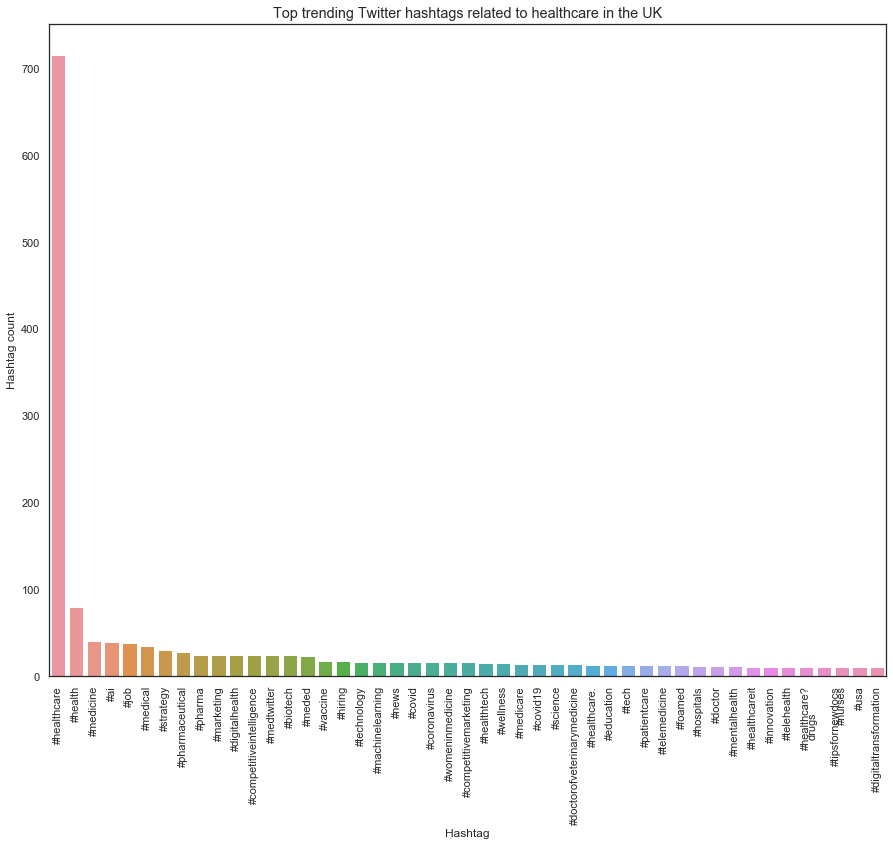

In [73]:
# Plot barchart of most represented tags.
sns.barplot(data=tags_top, x='Word', y='Count')
plt.xticks(rotation=90)

# Add chart title, adjust titles on the axes.
plt.xlabel("Hashtag")
plt.ylabel("Hashtag count")
plt.title("Top trending Twitter hashtags related to healthcare in the UK", fontsize='large')

The top trending hashtags related to healthcare in the UK feature #healthcare and #health as the most common (with the first one being over seven times more common than the second one), followed by #medicine, #ai, #job, perhaps suggesting a focus on the supply side of healthcare (related to resourcing, job optimisation and job search). A more detailed analysis of the content of these tweets beyond the simple hashtags would help clarify the topics of interest.

## 6) Making recommendations

In [74]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('/Users/FrancescaGalli/Documents/Python LSE/Assignment 2/LSE_DA201_Assignment_files/appointments_regional.csv')
ar.head()


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [75]:
# Filter the data set to only look at data from 2021-08 onwards.
ar_f = ar[ar['appointment_month'] > '2021-07']
ar_f.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,4961


Please note: the analysis that follow will be focused on data from 2021-08 onwards, as it represents the most recent full year of data available and will allow us to look at seasonal trends more closely.

**Question 1:** Should the NHS start looking at increasing staff levels? 

In [76]:
# Create an aggregated data set to review the different features.
ar_agg = ar_f.groupby(['appointment_month', 'hcp_type', 'appointment_status', 'appointment_mode', \
                     'time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()

# View the DataFrame.
ar_agg.head()

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2021-08,GP,Attended,Face-to-Face,1 Day,507835
1,2021-08,GP,Attended,Face-to-Face,15 to 21 Days,194726
2,2021-08,GP,Attended,Face-to-Face,2 to 7 Days,959486
3,2021-08,GP,Attended,Face-to-Face,22 to 28 Days,102111
4,2021-08,GP,Attended,Face-to-Face,8 to 14 Days,398772


In [77]:
# Determine the total number of appointments per month.
ar_df = ar_f.groupby('appointment_month')['count_of_appointments'].sum().reset_index()
ar_df.head()

,appointment_month,count_of_appointments
0,2021-08,23852171
1,2021-09,28522501
2,2021-10,30303834
3,2021-11,30405070
4,2021-12,25140776


In [78]:
# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value, and divide by 1200000 to get average daily utilisation.
ar_df['utilisation'] = (ar_df['count_of_appointments'] / 30) / 1200000

# Round utilisation to two decimals.
ar_df['utilisation'] = ar_df['utilisation'].round(2)

# View the DataFrame.
ar_df

,appointment_month,count_of_appointments,utilisation
0,2021-08,23852171,0.66
1,2021-09,28522501,0.79
2,2021-10,30303834,0.84
3,2021-11,30405070,0.84
4,2021-12,25140776,0.70
5,2022-01,25635474,0.71
6,2022-02,25355260,0.70
7,2022-03,29595038,0.82
8,2022-04,23913060,0.66
9,2022-05,27495508,0.76


Text(0.5, 1.0, 'Total appointments per month')

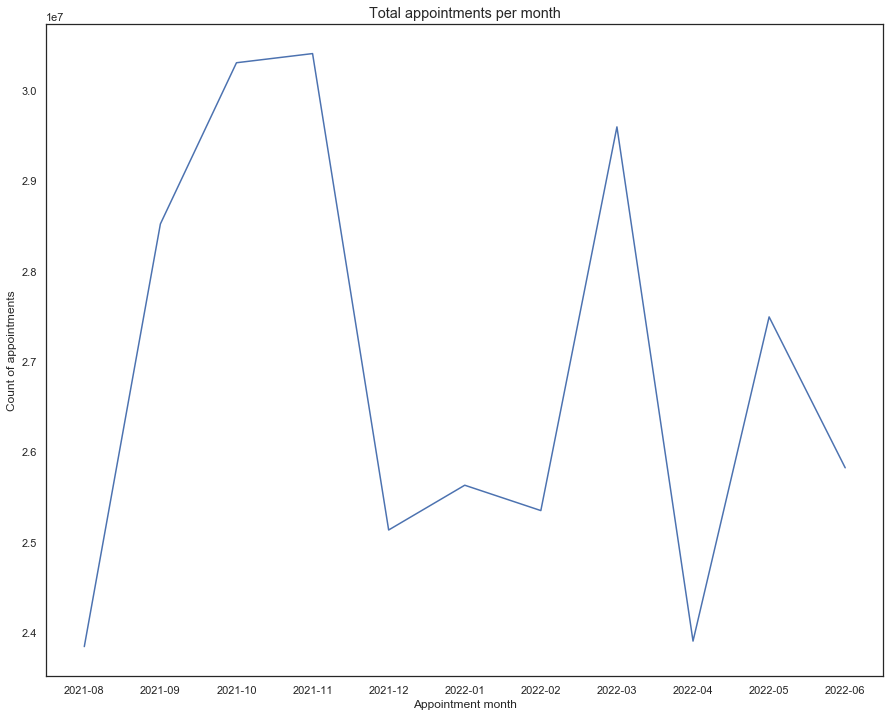

In [80]:
# Plot sum of count of monthly visits.
# Create a lineplot with Seaborn.
sns.lineplot(data=ar_df, x='appointment_month', y='count_of_appointments')

# Add chart title, adjust titles on the axes.
plt.xlabel("Appointment month")
plt.ylabel("Count of appointments")
plt.title("Total appointments per month", fontsize='large')

Text(0.5, 1.0, 'Utilisation of services per month')

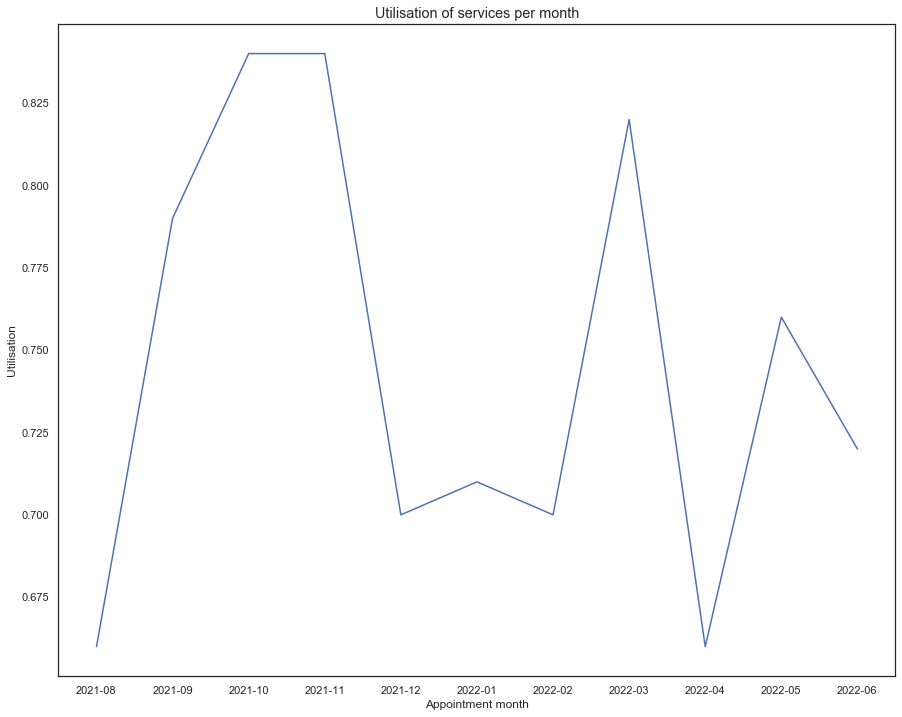

In [81]:
# Plot monthly capacity utilisation.
# Create a lineplot.
sns.lineplot(data=ar_df, x='appointment_month', y='utilisation')

# Add chart title, adjust titles on the axes.
plt.xlabel("Appointment month")
plt.ylabel("Utilisation")
plt.title("Utilisation of services per month", fontsize='large')

The utilisation data shows peaks in the autumn and spring, where service utilisation is around 84% and 82% respectively. Services are the least utilised in April at 66%. The NHS might consider increasing staffing levels in the busiest part of the year to cope with any exceptional demand that might be required.

**Question 2:** How do the healthcare professional types differ over time?

Text(0.5, 1.0, 'Total appointments per month across healthcare professionals')

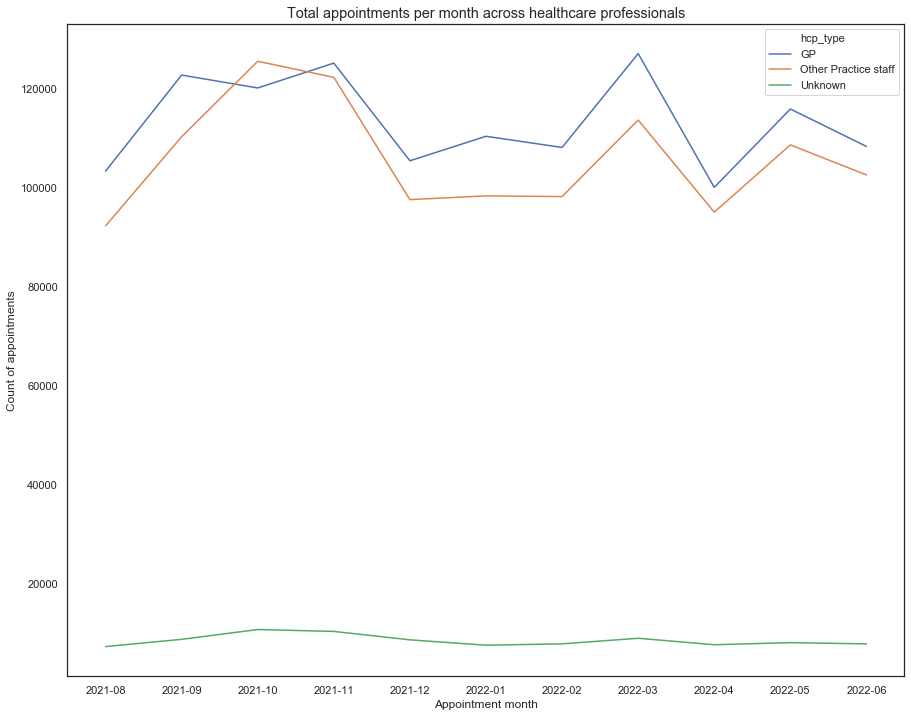

In [82]:
# Create a line plot to answer the question.
sns.lineplot(data=ar_agg, x='appointment_month', y='count_of_appointments', hue='hcp_type', ci=None)

# Add chart title, adjust titles on the axes.
plt.xlabel("Appointment month")
plt.ylabel("Count of appointments")
plt.title("Total appointments per month across healthcare professionals", fontsize='large')

Overall, the GPs are the healthcare professional type undertaking the most appointments, except during a peak in the autumn (October) when other health care professionals appear to be more busy.

**Question 3:** Are there significant changes in whether or not visits are attended?

Text(0.5, 1.0, 'Total appointments per month by appointment status')

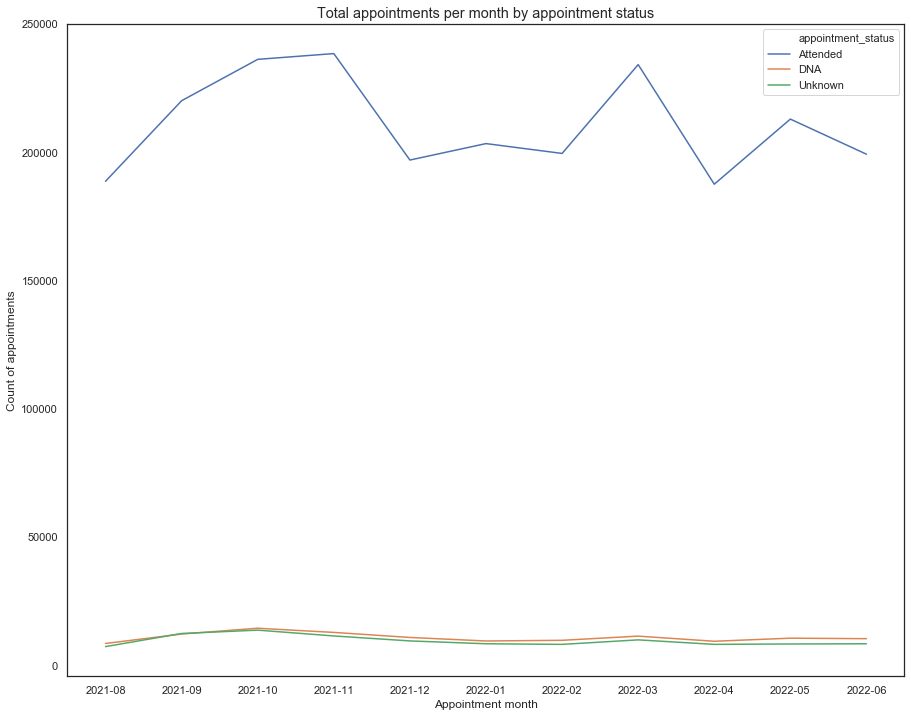

In [83]:
# Create a line plot to answer the question.
sns.lineplot(data=ar_agg, x='appointment_month', y='count_of_appointments', hue='appointment_status', ci=None)

# Add chart title, adjust titles on the axes.
plt.xlabel("Appointment month")
plt.ylabel("Count of appointments")
plt.title("Total appointments per month by appointment status", fontsize='large')

Based on the appointment status data, there are peaks of attended appointments mainly in the autumn and in the spring. However, these peaks mirrored by peaks in DNA (did not attend) appointments, which suggests that there is an underlying seasonal trend that drives the numbers. In order to better investigate the trend and compare months against each other, we should look at proportion of Attended vs DNA/Unknown appointments each month. We can do this by finding the ratio of Attended appointments over the total appointments across each month. 

In [84]:
# Create a new DataFrame to better compare the proportion of attended appointments versus the proportion of 
# DNA/Unknown appointments.
ar_as = ar_agg.groupby(['appointment_month','appointment_status'])['count_of_appointments'].sum().reset_index()

# View the DataFrame.
ar_as

,appointment_month,appointment_status,count_of_appointments
0,2021-08,Attended,22081765
1,2021-08,DNA,949137
2,2021-08,Unknown,821269
3,2021-09,Attended,25757066
4,2021-09,DNA,1321348
5,2021-09,Unknown,1444087
6,2021-10,Attended,27170506
7,2021-10,DNA,1565624
8,2021-10,Unknown,1567704
9,2021-11,Attended,27667665


In [85]:
# Create a new DataFrame merging ar_as and ar_df where the total number of appointments per month is stored.
ar_m = ar_as.merge(ar_df, how='left', on='appointment_month')
ar_m

,appointment_month,appointment_status,count_of_appointments_x,count_of_appointments_y,utilisation
0,2021-08,Attended,22081765,23852171,0.66
1,2021-08,DNA,949137,23852171,0.66
2,2021-08,Unknown,821269,23852171,0.66
3,2021-09,Attended,25757066,28522501,0.79
4,2021-09,DNA,1321348,28522501,0.79
5,2021-09,Unknown,1444087,28522501,0.79
6,2021-10,Attended,27170506,30303834,0.84
7,2021-10,DNA,1565624,30303834,0.84
8,2021-10,Unknown,1567704,30303834,0.84
9,2021-11,Attended,27667665,30405070,0.84


In [86]:
 # Create a column to calculate the ratio of Attended/DNA/Unknown appointments to the total number of appointments.
ar_m['ratio_status'] = ar_m['count_of_appointments_x']/ar_m['count_of_appointments_y']

# Filter the DataFrame to show only Attended apppointment status.
ar_m = ar_m[ar_m['appointment_status'] == 'Attended']

Text(0.5, 1.0, 'Proportion of appointments per month with Attended status')

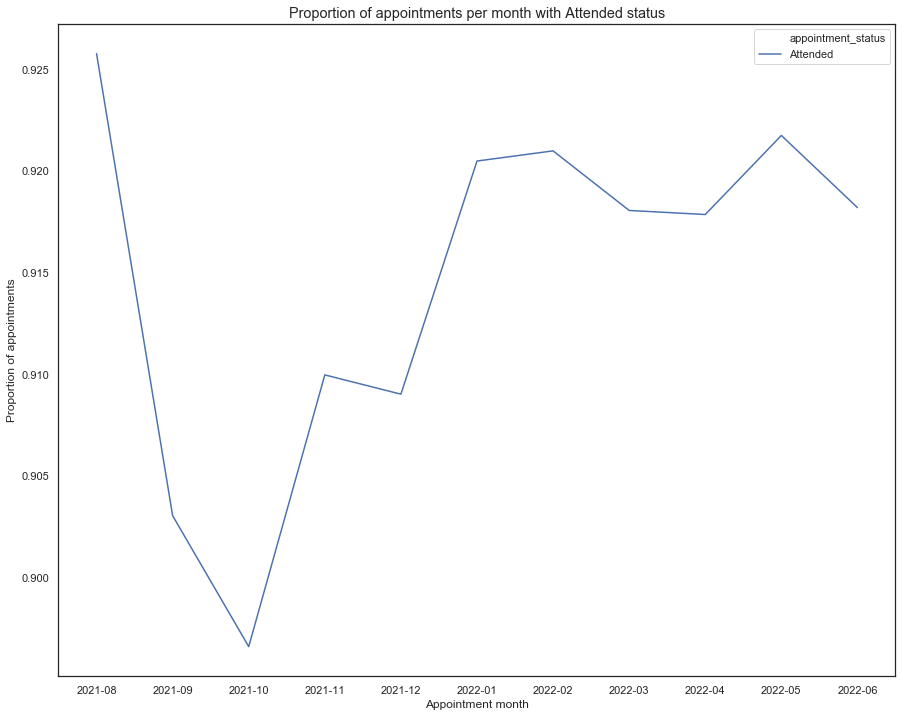

In [100]:
# Create a line plot to answer the question based on the newly created ratio column.
sns.lineplot(data=ar_m, x='appointment_month', y='ratio_status', hue='appointment_status', ci=None)

# Add chart title, adjust titles on the axes.
plt.xlabel("Appointment month")
plt.ylabel("Proportion of appointments")
plt.title("Proportion of appointments per month with Attended status", fontsize='large')

By looking at the proportion of Attended appointments, we can see that there is a drop in the proportion of attended appointments between the months of September and January compared with the rest of the year.

**Question 4:** Are there changes in terms of appointment type and the busiest months?

Text(0.5, 1.0, 'Total appointments per month by appointment mode')

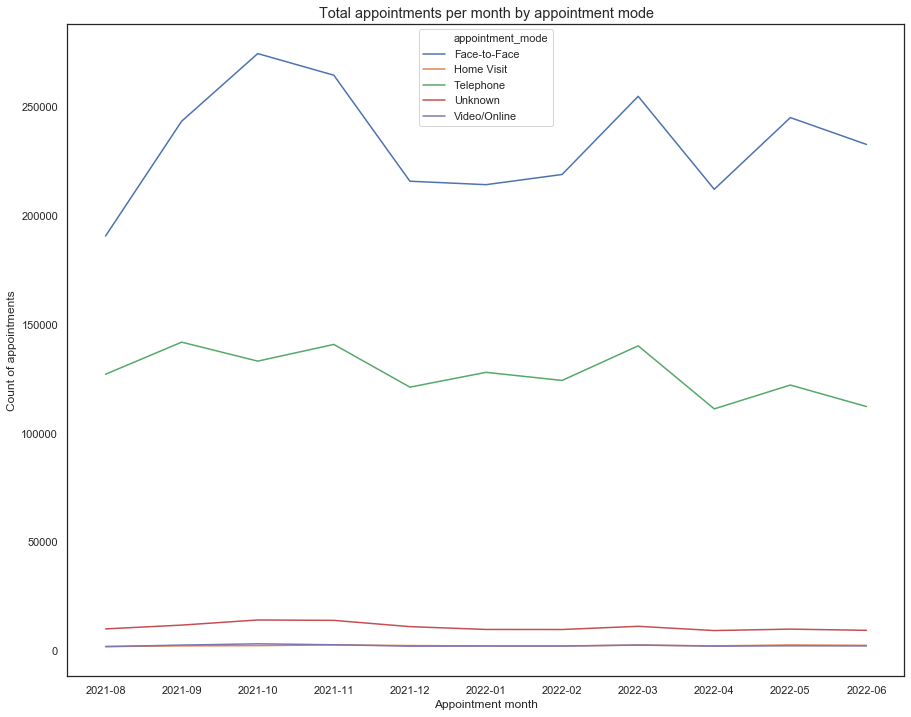

In [88]:
# Create a line plot to answer the question.
sns.lineplot(data=ar_agg, x='appointment_month', y='count_of_appointments', hue='appointment_mode', ci=None)

# Add chart title, adjust titles on the axes.
plt.xlabel("Appointment month")
plt.ylabel("Count of appointments")
plt.title("Total appointments per month by appointment mode", fontsize='large')

In terms of appointment type, face-to-face appointments are the most frequent, and they are the ones experiencing the most evident seasonal peaks in autumn and spring. On the other hand, telephone appointments, home visits and video/online are much more constant across the year. Telephone appointments seem to be more closely related with face-to-face appointments in terms of seasonal trend, which suggests that they might act as an effective substitute should the need arise. 

**Question 5:** Are there any trends in time between booking an appointment?

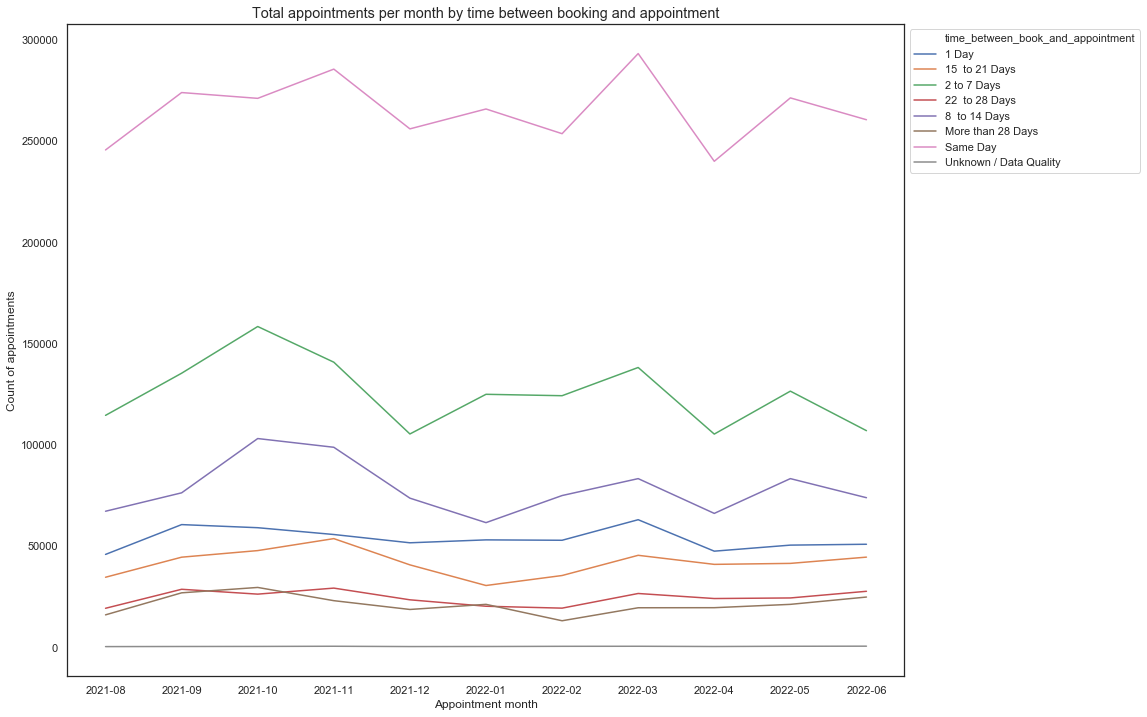

In [89]:
# Create a line plot to answer the question.
sns.lineplot(data=ar_agg, x='appointment_month', y='count_of_appointments', hue='time_between_book_and_appointment', ci=None)

# Add chart title, adjust titles on the axes.
plt.xlabel("Appointment month")
plt.ylabel("Count of appointments")
plt.title("Total appointments per month by time between booking and appointment", fontsize='large')

# Re-position the legend.
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

The most common time lag between booking an appointment and the appointment itself is within the same day, while the least common is over 28 days. An interesting find is that the time lag of 1 day is actually less common than time lags of 2-7 days and 8-14 days. A potential recommendation would be to incentivise patients to book appointments more in advance in order to better forecast demand for services. This could be done in relation to visits that are not within the General Practice service setting, which are of a less immediate nature (unlike what a sudden illness could be).

**Question 6:** How do the spread of service settings compare?

In [94]:
# View the national category DataFrame created earlier, grouped by appointment month and service settings.
nc_ss

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843
5,2021-09,Extended Access Provision,187906
6,2021-09,General Practice,25940821
7,2021-09,Other,527174
8,2021-09,Primary Care Network,530485
9,2021-09,Unmapped,1336115


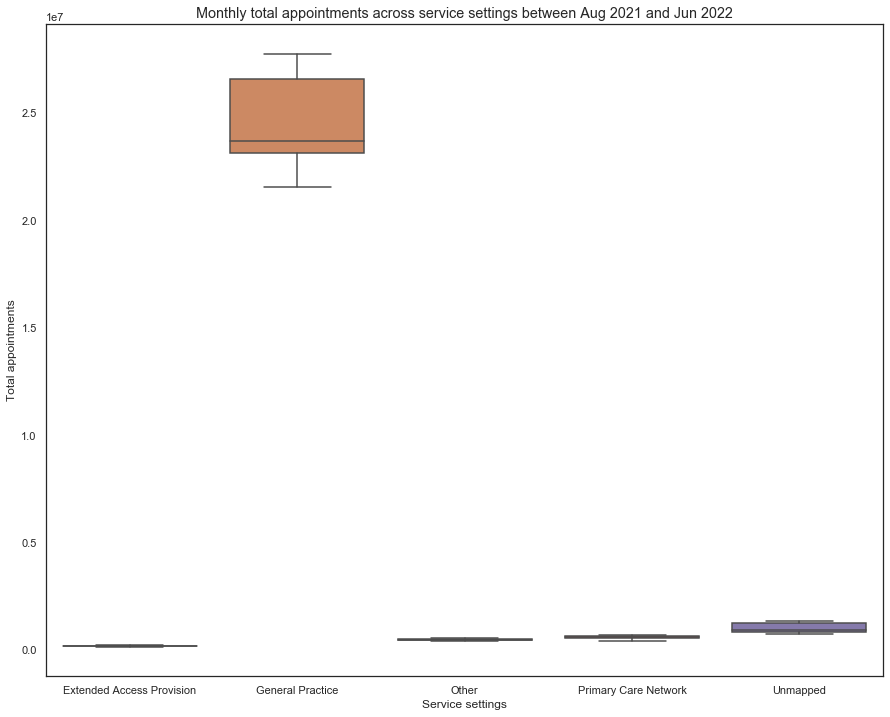

In [95]:
# Create a boxplot to investigate spread of service settings.
sns.boxplot(x='service_setting', y='count_of_appointments', data=nc_ss)

# Add chart title and adjust titles on the axes.
plt.xlabel("Service settings")
plt.ylabel("Total appointments")
plt.title("Monthly total appointments across service settings between Aug 2021 and Jun 2022", fontsize='large')


# Show the plot.
plt.show()

In [90]:
# Filter out the GP service setting
nc_ss_nogp = nc_ss[nc_ss['service_setting'] != 'General Practice']

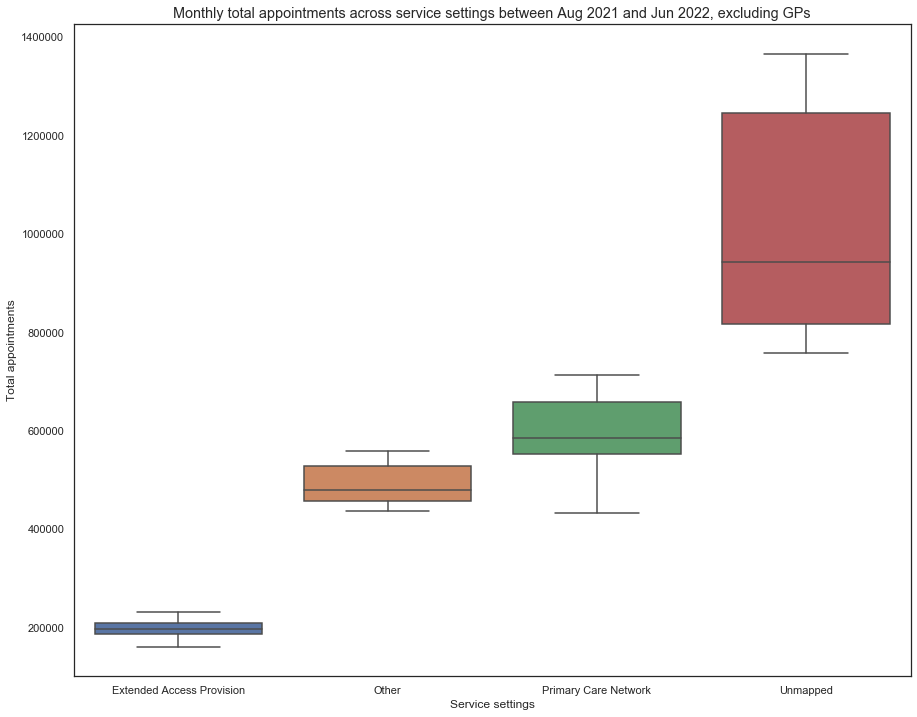

In [99]:
# Create a boxplot to investigate the service settings without GP.
sns.boxplot(x='service_setting', y='count_of_appointments', data=nc_ss_nogp)

# Add chart title and adjust titles on the axes.
plt.xlabel("Service settings")
plt.ylabel("Total appointments")
plt.title("Monthly total appointments across service settings between Aug 2021 and Jun 2022, excluding GPs",\
          fontsize='large')

# Show the plot.
plt.show()

The spread of General Practice monthly total appointments is much larger than the other service settings, as well as registering much higher total appointments overall as seen previously. By excluding General Practice from the chart, we can look more closely at the spread of the other service settings. The Unmapped category is the second most variable on a monthly basis, suggesting that a greater effort of mapping these appointments to the appropriate category would help with understanding demand for specific service settings. Primary Care Network is the third most variable category, but much less variable than Unmapped and General Practice, therefore more stable in terms of demand.

### Summary recommendations:

- Smooth demand for GPs across the week where possible to lead to more predictable demand.
- Conduct a more detailed analysis of the content of UK healthcare tweets beyond hashtags to help clarify the topics of interest.
- The NHS might consider increasing staffing levels in the busiest part of the year to cope with any exceptional demand that might be required, however maximum capacity has not been reached within the period analysed
- More data could be collected at the point where patients cancel appointments to determine causes.
- Telephone appointments seem to be more closely related with face-to-face appointments in terms of seasonal trend, which suggests that they might act as an effective substitute should the need arise.
- Incentivise patients to book appointments more in advance in order to better forecast demand for services. This could be done in relation to visits that are not within the General Practice service setting, which are of a less immediate nature (unlike what a sudden illness could be)
- A greater effort in mapping appointments to the appropriate category would help with understanding demand for specific service settings.